# The Skyline Problem

Given n rectangular buildings in a 2-dimensional city, computes the skyline of these buildings, eliminating hidden lines. The main task is to view buildings from a side and remove all sections that are not visible.

All buildings share common bottom and every building is represented by triplet (left, ht, right)

 - 'left': is x coordinated of left side (or wall).
 - 'right': is x coordinate of right side
 - 'ht': is height of building.

A skyline is a collection of rectangular strips. A rectangular strip is represented as a pair (left, ht) where left is x coordinate of left side of strip and ht is height of strip.

```
buildings = [(1,11,5), (2,6,7), (3,13,9), (12,7,16), (14,3,25),
            (19,18,22), (23,13,29), (24,4,28) ]
```

## Assumptions

 - the building list isn't ordered in any particular way


I think it would be a lot easier if we can put the buildings in a defined space first.

## Strategy

I'm far too stupid to be able to do this using just edges. On the other hand, I know that indexing into numpy arrays is an operation that someone else (much smarter than I) has optimized. So for my strategy instead of comparing edges and heights I'm going to:

 - find the outer bounds of the image
 - fill in all buildings with indexing across the image
 - for each column, use the sum to determine the height

In [60]:
# Dependencies

import numpy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Define buildings
        
buildings = [(1,11,5), (2,6,7), (3,13,9), (12,7,16), (14,3,25),
            (19,18,22), (23,13,29), (24,4,28) ]

# We need to shift the entire skyline by the left
left = min([x[0] for x in buildings])
height = max([x[1] for x in buildings])
right = max([x[2] for x in buildings])

# Skyline is going to be a 2D image, height--> # rows, width --> columns
skyline = numpy.zeros(shape=(height, right+1))

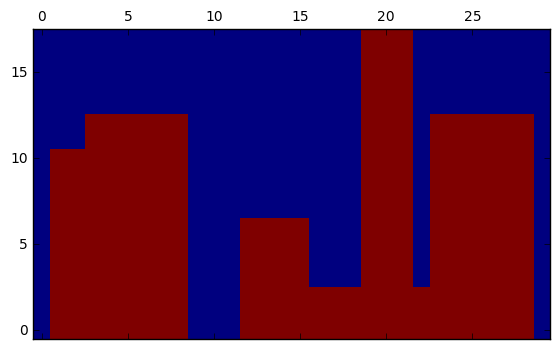

In [61]:
for building in buildings:

    # Raw values are not relative to origin
    left_x, height_a, right_x = building
    skyline[0:height_a,left_x:right_x] = 1

plt.matshow(skyline)
ax = plt.gca()
ax.invert_yaxis()
plt.show()

## What are the lines?

Now we want to answer the question and give a list or coordinates for the edges that we see above. Since we subtracted the left from each line, we will add it back in order to restore our original space.

In [62]:
lines = []
last_height = 0

for c in range(skyline.shape[1]):
    col = skyline[:,c]
    
    # If the sum is 0, it's empty space
    height = sum(col)
    
    if height != last_height:
        # We only need to add the coordinate if it's a different height
        lines.append((c, height))
        last_height = height

In [63]:
lines

[(1, 11.0),
 (3, 13.0),
 (9, 0.0),
 (12, 7.0),
 (16, 3.0),
 (19, 18.0),
 (22, 3.0),
 (23, 13.0),
 (29, 0.0)]

Here is the answer given in the example, for reference:

```
 Skyline for given buildings is
 (1, 11),  (3, 13),  (9, 0),  (12, 7),  (16, 3),  (19, 18), 
 (22, 3),  (23, 13),  (29, 0),
 ```